In [1]:
# отключим предупреждения Anaconda
import warnings
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, train_test_split
warnings.simplefilter('ignore')

In [2]:
import numpy as np

# будем отображать графики прямо в jupyter'e
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [4]:
def form_noisy_data(n_obj=1000, n_feat=100, random_seed=17):
    """Код для генерации шумных данных с паттерном"""
    np.seed = random_seed
    y_shadow = np.random.choice([-1, 1], size=n_obj)
    # первый признак пропорционален целевому
    x1 = 0.3 * y_shadow
    # остальные признаки – шум
    x_other = np.random.random(size=[n_obj, n_feat - 1])

    return np.hstack([x1.reshape([n_obj, 1]), x_other]), y_shadow

X, y = form_noisy_data()

In [5]:
# делим выборку на тренировочную и отложенную

X_train, X_holdout, y_train, y_holdout = train_test_split(X, y, test_size=0.3,
random_state=17)

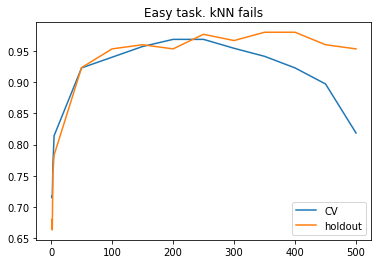

In [6]:
cv_scores, holdout_scores = [], []
n_neighb = [1, 2, 3, 5] + list(range(50, 550, 50))

for k in n_neighb:

    knn = KNeighborsClassifier(n_neighbors=k)
    cv_scores.append(np.mean(cross_val_score(knn, X_train, y_train, cv=5)))
    knn.fit(X_train, y_train)
    holdout_scores.append(accuracy_score(y_holdout, knn.predict(X_holdout)))

plt.plot(n_neighb, cv_scores, label='CV')
plt.plot(n_neighb, holdout_scores, label='holdout')
plt.title('Easy task. kNN fails')
plt.legend();

In [13]:
# Обучение дерева

tree = DecisionTreeClassifier(random_state=17, max_depth=1)
tree_cv_score = np.mean(cross_val_score(tree, X_train, y_train, cv=5))
tree.fit(X_train, y_train)
tree_holdout_score = accuracy_score(y_holdout, tree.predict(X_holdout))
print('Decision tree. CV: {}, holdout: {}'.format(tree_cv_score, tree_holdout_score))


Decision tree. CV: 1.0, holdout: 1.0
